In [21]:
%autoreload 2

import pandas as pd
import numpy as np
from loaders import pv_data
import datetime

TEST_SIZE = 50
TRAIN_SIZE = 681
ZONES = ['ZONE_1', 'ZONE_2', 'ZONE_3']

pv_GEF, index = pv_data(path_name='data/solar_new.csv', test_size=TEST_SIZE, random_state=0)
pv_df = pd.read_csv('data/solar_new.csv')

pv_df.rename( columns={'POWER' :'TARGETVAR'}, inplace=True )
pv_df['OLD_TIMESTAMP'] =  pd.to_datetime(pv_df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
pv_df['TIMESTAMP'] =  pd.DatetimeIndex(pv_df['OLD_TIMESTAMP']) + pd.offsets.Hour(-1)
pv_df['hour'] = pd.DatetimeIndex(pv_df['TIMESTAMP']).hour.values
pv_df['month'] = pd.DatetimeIndex(pv_df['TIMESTAMP']).month.values
pv_df['new_date'] = [d.date() for d in pv_df['TIMESTAMP']]
pv_df

zone 1 [ 0  1  2  3 20 21 22 23]
zone 2 [ 0  1  2  3 20 21 22 23]
zone 3 [ 0  1  2  3 20 21 22 23]
ZONE_1 #LS 720 days #VS 50 days # TEST 50 days
ZONE_2 #LS 720 days #VS 50 days # TEST 50 days
ZONE_3 #LS 720 days #VS 50 days # TEST 50 days


,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,...,VAR178,VAR228,TARGETVAR,ZONE_1,ZONE_2,ZONE_3,OLD_TIMESTAMP,hour,month,new_date
0,2012-04-02 00:00:00,0.001480,0.000000,94730.3750,95.559967,0.039764,0.622430,0.318149,284.133057,0.000000,...,0.000000,0.000000e+00,0.0,1.0,0.0,0.0,2012-04-02 01:00:00,0,4,2012-04-02
1,2012-04-02 01:00:00,0.005981,0.000000,94721.5625,99.391953,0.386597,-0.404500,1.343286,282.870117,0.000000,...,0.000000,4.770000e-07,0.0,1.0,0.0,0.0,2012-04-02 02:00:00,1,4,2012-04-02
2,2012-04-02 02:00:00,0.020294,0.000000,94707.7500,99.679733,0.937317,-0.493649,1.279655,282.885498,0.000000,...,0.000000,0.000000e+00,0.0,1.0,0.0,0.0,2012-04-02 03:00:00,2,4,2012-04-02
3,2012-04-02 03:00:00,0.043617,0.000000,94699.6875,100.207092,0.970123,-0.298454,1.204877,283.157227,0.000000,...,0.000000,5.245000e-06,0.0,1.0,0.0,0.0,2012-04-02 04:00:00,3,4,2012-04-02
4,2012-04-02 04:00:00,0.047783,0.000000,94733.3125,99.531464,0.893005,-0.127774,1.207767,283.314209,0.000000,...,0.000000,7.629000e-06,0.0,1.0,0.0,0.0,2012-04-02 05:00:00,4,4,2012-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59035,2014-06-30 19:00:00,0.087723,0.008083,92620.3125,70.493210,0.731356,3.498983,0.649449,276.499268,0.000000,...,0.057222,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 20:00:00,19,6,2014-06-30
59036,2014-06-30 20:00:00,0.093201,0.003681,92653.5000,73.417557,0.683899,3.081870,0.055409,276.612060,0.000000,...,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 21:00:00,20,6,2014-06-30
59037,2014-06-30 21:00:00,0.061859,0.000497,92689.0000,75.435608,0.709900,2.663280,-0.151795,276.960449,0.073056,...,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 22:00:00,21,6,2014-06-30
59038,2014-06-30 22:00:00,0.062805,0.000186,92732.8125,76.413162,0.941956,2.348825,-0.165719,277.130127,0.000000,...,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 23:00:00,22,6,2014-06-30


In [8]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import datetime

test_dates = []
for d in pv_GEF[5].index:
    test_dates.append(d.date())

train_dates = []
for d in pv_GEF[1].index:
    train_dates.append(d.date())
for d in pv_GEF[3].index:
    train_dates.append(d.date())

    
features = ['VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165',
       'VAR166', 'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228',
       'ZONE_1', 'ZONE_2', 'ZONE_3', 'hour', 'month']
test_dates = pd.Series(test_dates)
train_dates = pd.Series(train_dates)
train = pv_df[~pv_df['new_date'].isin(test_dates.unique())].copy()
test = pv_df[pv_df['new_date'].isin(test_dates.unique())].copy()
x_train = train[features]
x_test = test[features]
y_train = train['TARGETVAR']
y_test = test['TARGETVAR']

In [29]:
x_train

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,ZONE_1,ZONE_2,ZONE_3,hour,month
0,0.001480,0.000000,94730.3750,95.559967,0.039764,0.622430,0.318149,284.133057,0.000000,299.284444,0.000000,0.000000e+00,1.0,0.0,0.0,0,4
1,0.005981,0.000000,94721.5625,99.391953,0.386597,-0.404500,1.343286,282.870117,0.000000,303.120000,0.000000,4.770000e-07,1.0,0.0,0.0,1,4
2,0.020294,0.000000,94707.7500,99.679733,0.937317,-0.493649,1.279655,282.885498,0.000000,318.617778,0.000000,0.000000e+00,1.0,0.0,0.0,2,4
3,0.043617,0.000000,94699.6875,100.207092,0.970123,-0.298454,1.204877,283.157227,0.000000,331.293333,0.000000,5.245000e-06,1.0,0.0,0.0,3,4
4,0.047783,0.000000,94733.3125,99.531464,0.893005,-0.127774,1.207767,283.314209,0.000000,332.955556,0.000000,7.629000e-06,1.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59035,0.087723,0.008083,92620.3125,70.493210,0.731356,3.498983,0.649449,276.499268,0.000000,287.667500,0.057222,0.000000e+00,0.0,0.0,1.0,19,6
59036,0.093201,0.003681,92653.5000,73.417557,0.683899,3.081870,0.055409,276.612060,0.000000,297.188333,0.000000,0.000000e+00,0.0,0.0,1.0,20,6
59037,0.061859,0.000497,92689.0000,75.435608,0.709900,2.663280,-0.151795,276.960449,0.073056,308.393889,0.000000,0.000000e+00,0.0,0.0,1.0,21,6
59038,0.062805,0.000186,92732.8125,76.413162,0.941956,2.348825,-0.165719,277.130127,0.000000,311.716111,0.000000,0.000000e+00,0.0,0.0,1.0,22,6


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_pinball_loss, mean_squared_error

num_quantiles = 100
quantiles = np.arange(0, 1, 1/num_quantiles)[1:]

common_params = dict(
    learning_rate=0.05,
    n_estimators=600,
    max_depth=7,
    min_samples_leaf=9,
    min_samples_split=9,
)

predictions = []
train_predictions = []
for alpha in quantiles:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    model = gbr.fit(x_train, y_train)
    y_pred = gbr.predict(x_test)

    x_pred = gbr.predict(x_train)
    predictions.append(y_pred)
    train_predictions.append(x_pred)
predictions = np.array(predictions)
train_predictions = np.array(train_predictions)

In [31]:
sorted_predictions = np.sort(predictions, axis=0)
sorted_train_predictions = np.sort(train_predictions, axis=0)

results = []
for i, q in enumerate(quantiles):
    results.append(mean_pinball_loss(y_test, sorted_predictions[i], alpha=q))

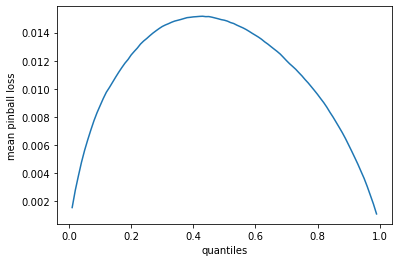

In [32]:
import matplotlib.pyplot as plt

plt.plot(quantiles, results)
plt.ylabel('mean pinball loss')
plt.xlabel('quantiles')
plt.show()

Quantile sqore: 1.1020415343442207


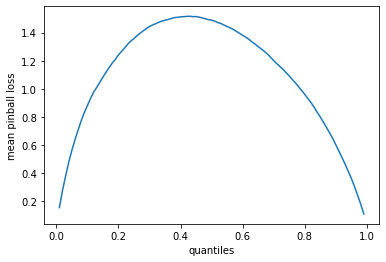

In [33]:
import metrics

plf = metrics.plf_per_quantile(sorted_predictions, y_test)
print("Quantile sqore:", plf.mean())
plt.plot(quantiles, plf)
plt.ylabel('mean pinball loss')
plt.xlabel('quantiles')
plt.show()

In [34]:
y_copy = pd.DataFrame(y_test.copy())
y_copy['pos'] = np.arange(y_test.shape[0])
y_copy['old_pos'] = y_copy.index
y_copy

,TARGETVAR,pos,old_pos
192,0.0,0,192
193,0.0,1,193
194,0.0,2,194
195,0.0,3,195
196,0.0,4,196
...,...,...,...
58843,0.0,3595,58843
58844,0.0,3596,58844
58845,0.0,3597,58845
58846,0.0,3598,58846


In [36]:
import copula
N_SCENARIOS = 100

y_to_pass = []
scenarios_pred = []
for zone in ZONES:

    for i in range(TEST_SIZE):
        pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == test_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_copy[y_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == test_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['TARGETVAR']
        generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrix, n_scenarios=N_SCENARIOS, rnd_seed=[0], sort=True)
        scenarios_pred.append(generated_scenarios)
        y_to_pass.append(actual_data)


In [37]:
y_to_pass = np.array(y_to_pass)

scenarios_pred = np.array(scenarios_pred)
scenarios_pred = scenarios_pred.reshape(-1, N_SCENARIOS)
scenarios_pred.shape

(3600, 100)

In [38]:
import metrics

energy_scoring = metrics.energy_score(scenarios_pred, y_to_pass)
np.array(energy_scoring).mean() * 100

22.503874621902263

In [42]:
import copula
y_train_copy = pd.DataFrame(y_train.copy())
y_train_copy['pos'] = np.arange(y_train.shape[0])
y_train_copy['old_pos'] = y_train_copy.index

TRAIN_SIZE = 720+50
idx = np.arange(TRAIN_SIZE)
np.random.shuffle(idx)

cov_matrixes = {}
for zone in ZONES:
    cov_matrixes[zone] = np.identity(24)
    for i in idx:
        pred = pd.DataFrame(sorted_train_predictions[:,y_train_copy[y_train_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == train_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_train_copy[y_train_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == train_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['TARGETVAR']
        cov_matrixes[zone] = copula.update_cov_matrix(df_y_pred_q=pred, quantiles=quantiles, 
                          actual_data=actual_data, forget_factor=0.99, cov_matrix=cov_matrixes[zone])
        
y_to_pass = []
scenarios_pred = []
for zone in ZONES:

    for i in range(TEST_SIZE):
        pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == test_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_copy[y_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == test_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['TARGETVAR']
        generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrixes[zone], n_scenarios=N_SCENARIOS, rnd_seed=[0], sort=True)
        scenarios_pred.append(generated_scenarios)
        y_to_pass.append(actual_data)

y_to_pass = np.array(y_to_pass)

scenarios_pred = np.array(scenarios_pred)
scenarios_pred = scenarios_pred.reshape(-1, N_SCENARIOS)

energy_scoring = metrics.energy_score(scenarios_pred, y_to_pass)
print("Average energy score:", np.array(energy_scoring).mean() * 100)

Average energy score: 21.73969135483523


In [44]:
dict_results = {}
mean_scores = []
for zone in ZONES:
    y_to_pass = []
    scenarios_pred = []
    for i in range(TEST_SIZE):
        pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == test_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_copy[y_copy['old_pos'].isin(pv_df[(pv_df['new_date'] == test_dates.unique()[i]) & (pv_df[zone] == 1)].index)]['TARGETVAR']
        generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrixes[zone], n_scenarios=N_SCENARIOS, rnd_seed=[0], sort=True)
        scenarios_pred.append(generated_scenarios)
        y_to_pass.append(actual_data)
        
    y_to_pass = np.array(y_to_pass)

    scenarios_pred = np.array(scenarios_pred)
    scenarios_pred = scenarios_pred.reshape(-1, N_SCENARIOS)
    energy_scoring = metrics.energy_score(scenarios_pred, y_to_pass)
    mean_energy_score = np.array(energy_scoring).mean() * 100
    mean_scores.append(mean_energy_score)
    dict_results[zone] = {'predictions':scenarios_pred, 'Ys': y_to_pass, 'energy_scores': energy_scoring, 'mean_score':mean_energy_score}
    print("Average energy score in ", zone, mean_energy_score)

Average energy score in  ZONE_1 20.093689225008234
Average energy score in  ZONE_2 22.71677412626744
Average energy score in  ZONE_3 22.408610713230022


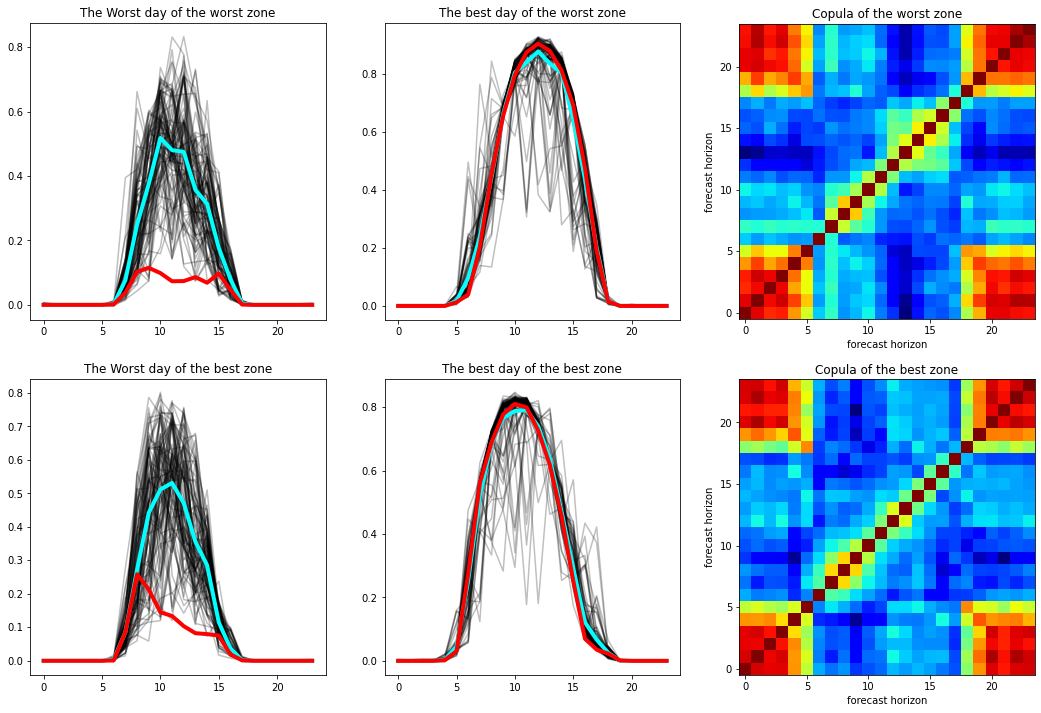

In [45]:
mean_scores = np.array(mean_scores)
Worst_zone = 'ZONE_' + str(np.argmax(mean_scores) + 1)
Best_zone = 'ZONE_' + str(np.argmin(mean_scores) + 1)

fig = plt.figure(figsize=(18, 12))

columns = 3
rows = 2

ax = []
ax.append( fig.add_subplot(rows, columns, 1) )
ax[-1].set_title("The Worst day of the worst zone")
worst_day = np.argmax(dict_results[Worst_zone]['energy_scores'])
plt.plot(dict_results[Worst_zone]['predictions'][worst_day*24:worst_day*24+24], color='k', alpha=0.25)
plt.plot(dict_results[Worst_zone]['predictions'][worst_day*24:worst_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), dict_results[Worst_zone]['Ys'][worst_day], color='red', linewidth=4)

best_day = np.argmin(dict_results[Worst_zone]['energy_scores'])
ax.append( fig.add_subplot(rows, columns, 2) )
ax[-1].set_title("The best day of the worst zone")
plt.plot(dict_results[Worst_zone]['predictions'][best_day*24:best_day*24+24], color='k', alpha=0.25)
plt.plot(dict_results[Worst_zone]['predictions'][best_day*24:best_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), dict_results[Worst_zone]['Ys'][best_day], color='red', linewidth=4)

ax.append( fig.add_subplot(rows, columns, 3) )
ax[-1].set_title("Copula of the worst zone")
plt.imshow(cov_matrixes[Worst_zone], cmap='jet', origin='lower')
plt.xlabel('forecast horizon')
plt.ylabel('forecast horizon')


ax.append( fig.add_subplot(rows, columns, 4) )
ax[-1].set_title("The Worst day of the best zone")
worst_day = np.argmax(dict_results[Best_zone]['energy_scores'])
plt.plot(dict_results[Best_zone]['predictions'][worst_day*24:worst_day*24+24], color='k', alpha=0.25)
plt.plot(dict_results[Best_zone]['predictions'][worst_day*24:worst_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), dict_results[Best_zone]['Ys'][worst_day], color='red', linewidth=4)

best_day = np.argmin(dict_results[Best_zone]['energy_scores'])
ax.append( fig.add_subplot(rows, columns, 5) )
ax[-1].set_title("The best day of the best zone")
plt.plot(dict_results[Best_zone]['predictions'][best_day*24:best_day*24+24], color='k', alpha=0.25)
plt.plot(dict_results[Best_zone]['predictions'][best_day*24:best_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), dict_results[Best_zone]['Ys'][best_day], color='red', linewidth=4)

ax.append( fig.add_subplot(rows, columns, 6) )
ax[-1].set_title("Copula of the best zone")
plt.imshow(cov_matrixes[Best_zone], cmap='jet', origin='lower')
plt.xlabel('forecast horizon')
plt.ylabel('forecast horizon')


plt.show()

In [ ]:
plt.plot(generated_scenarios.values, color='k', alpha=0.25)
plt.plot(generated_scenarios.values.mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), actual_data, color='red', linewidth=4)
plt.show()

In [ ]:
plt.imshow(cov_matrixes['ZONE_1'], cmap='jet', origin='lower')
plt.xlabel('forecast horizon')
plt.ylabel('forecast horizon')

plt.show()

In [ ]:
#0) correct the date issue
#1) apply on solar and power
#2) do some stuff with visualization - best and worth scores of best and worth zones
#3) feature engineering (include time of the day)